In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stats
from statistics import mean
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats

### Exploring/cleaning the CSV files

In [47]:
interestrates = pd.read_csv('interestrates.csv', sep = ',')
interestrates = interestrates.transpose()
interestrates = interestrates.iloc[1:, :]
interestrates = interestrates.rename(columns = {0:'interestrates'})
#converting from string to float
interestrates["interestrates"] = [float(str(i).replace(",", "")) for i in interestrates["interestrates"]]

interestrates.head()

,interestrates
1971,7.541750
1972,7.383269
1973,8.044808
1974,9.187115
1975,9.047115


In [48]:
gdppercapita = pd.read_csv('gdppercapita.csv', sep = ',')
gdppercapita = gdppercapita.transpose()
gdppercapita = gdppercapita.iloc[1:, :]
gdppercapita = gdppercapita.rename(columns = {0:'gdppercapita'})
gdppercapita["gdppercapita"] = [float(str(i).replace(",", "")) for i in gdppercapita["gdppercapita"]]
gdppercapita.head()

,gdppercapita
1980,12552.943
1981,13948.701
1982,14404.994
1983,15513.679
1984,17086.441


In [49]:
debtpercentofgdp = pd.read_csv('debtpercentofgdp.csv', sep = ',')
debtpercentofgdp = debtpercentofgdp.transpose()
debtpercentofgdp = debtpercentofgdp.iloc[1:, :]
debtpercentofgdp = debtpercentofgdp.rename(columns = {0:'debtpercentofgdp'})
debtpercentofgdp["debtpercentofgdp"] = [float(str(i).replace(",", "")) for i in debtpercentofgdp["debtpercentofgdp"]]
debtpercentofgdp.head()

,debtpercentofgdp
1980,41.18
1981,40.33
1982,44.98
1983,47.85
1984,49.51


In [50]:
hpi2000base = pd.read_csv('hpi2000base.csv', sep = ',')
hpi2000base = hpi2000base.transpose()
hpi2000base = hpi2000base.iloc[1:, :]
hpi2000base = hpi2000base.rename(columns = {0:'hpi2000base'})
hpi2000base["hpi2000base"] = [float(str(i).replace(",", "")) for i in hpi2000base["hpi2000base"]]
hpi2000base.head()

,hpi2000base
1976,27.67
1977,31.39
1978,36.05
1979,40.91
1980,44.98


In [51]:
inflationrate = pd.read_csv('inflationrate.csv', sep = ',')
inflationrate = inflationrate.transpose()
inflationrate = inflationrate.iloc[1:, :]
inflationrate = inflationrate.rename(columns = {0:'inflationrate'})
inflationrate["inflationrate"] = [float(str(i).replace(",", "")) for i in inflationrate["inflationrate"]]
inflationrate.head()

,inflationrate
1980,13.5
1981,10.4
1982,6.2
1983,3.2
1984,4.4


In [52]:
medianhouseholdincome = pd.read_csv('medianhouseholdincome.csv', sep = ',')
medianhouseholdincome = medianhouseholdincome.transpose()
medianhouseholdincome = medianhouseholdincome.rename(columns = {0:'medianhouseholdincome'})
medianhouseholdincome["medianhouseholdincome"] = [float(str(i).replace(",", "")) for i in medianhouseholdincome["medianhouseholdincome"]]
medianhouseholdincome.head()

,medianhouseholdincome
1990,30636.0
1991,31241.0
1992,32264.0
1993,34076.0
1994,35492.0


In [53]:
population = pd.read_csv('population.csv', sep = ',')
population = population.transpose()
population = population.rename(columns = {0:'population'})
population = population.iloc[1:, :]
population["population"] = [float(str(i).replace(",", "")) for i in population["population"]]
population.head()

,population
1980,227.622
1981,229.916
1982,232.128
1983,234.246
1984,236.307


In [54]:
yearlyavghomeprice = pd.read_csv('yearlyavghomeprice.csv', sep = ',')
yearlyavghomeprice = yearlyavghomeprice.transpose()
yearlyavghomeprice = yearlyavghomeprice.rename(columns = {0:'yearlyavghomeprice'})
yearlyavghomeprice["yearlyavghomeprice"] = [float(str(i).replace(",", "")) for i in yearlyavghomeprice["yearlyavghomeprice"]]
yearlyavghomeprice.head()

,yearlyavghomeprice
2000,123517.7944
2001,132509.4184
2002,141721.2079
2003,152557.0189
2004,166882.4914


## Merging Dataframes

In [76]:
df = pd.concat([interestrates, gdppercapita], axis=1)
df = pd.concat([df, debtpercentofgdp], axis=1)
df = pd.concat([df, hpi2000base], axis=1)
df = pd.concat([df, inflationrate], axis=1)
df = pd.concat([df, medianhouseholdincome], axis=1)
df = pd.concat([df, population], axis=1)
df = pd.concat([df, yearlyavghomeprice], axis=1)
df['year'] = df.index
#df["year"] = [int(str(i).replace(",", "")) for i in df["year"]]
#df = df.astype({'year':'int','yearlyavghomeprice':'float','population':'int','medianhouseholdincome':'float','inflationrate':'float','hpi2000base':'float','debtpercentofgdp':'float','gdppercapita':'float','interestrates':'float'})
metrics = df

df

,interestrates,gdppercapita,debtpercentofgdp,hpi2000base,inflationrate,medianhouseholdincome,population,yearlyavghomeprice,year
1971,7.541750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971
1972,7.383269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1973,8.044808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973
1974,9.187115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974
1975,9.047115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975
1976,8.865849,NaN,NaN,27.67,NaN,NaN,NaN,NaN,1976
1977,8.845192,NaN,NaN,31.39,NaN,NaN,NaN,NaN,1977
1978,9.641731,NaN,NaN,36.05,NaN,NaN,NaN,NaN,1978
1979,11.203654,NaN,NaN,40.91,NaN,NaN,NaN,NaN,1979
1980,13.742115,12552.943,41.18,44.98,13.5,NaN,227.622,NaN,1980


In [77]:
#variable reference
interestrates
gdppercapita
debtpercentofgdp
hpi2000base
inflationrate
medianhouseholdincome
population
yearlyavghomeprice
#year
yearlyavghomeprice.head(1)

,yearlyavghomeprice
2000,123517.7944


## Initial graphing

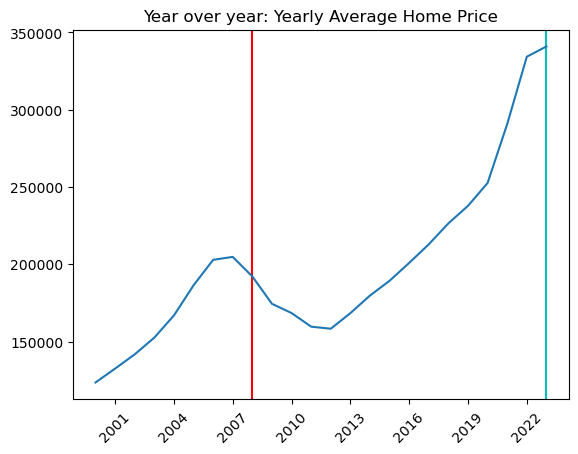

In [85]:
plt.title('Year over year: Yearly Average Home Price')
plt.xticks(np.arange(0, len(metrics.year)+1, 3))
plt.xticks(rotation=45)
plt.axvline(37, color = 'r', label = '2008')
plt.axvline(52, color = 'c', label = f'2023')
plt.plot(metrics.year,metrics.yearlyavghomeprice)

## Exploratory Data Analysis Part One:
### Finding r values vs. year to see which metric has been generally trending up the highest

Note - the datasets have different ranges, so this is just an exploratory estimate.

In [125]:
m1 = interestrates
m1['year'] = m1.index
m1["year"] = [float(str(i).replace(",", "")) for i in m1["year"]]
lin_m1 = scipy.stats.linregress(m1.year,m1.interestrates)
r_m1 = lin_m1.rvalue
r_m1

-0.7629339235465722

In [126]:
m2 = gdppercapita
m2['year'] = m2.index
m2["year"] = [float(str(i).replace(",", "")) for i in m2["year"]]
lin_m2 = scipy.stats.linregress(m2.year,m2.gdppercapita)
r_m2 = lin_m2.rvalue
r_m2

0.9777450304665005

In [128]:
m3 = debtpercentofgdp
m3['year'] = m3.index
m3["year"] = [float(str(i).replace(",", "")) for i in m3["year"]]
lin_m3 = scipy.stats.linregress(m3.year,m3.debtpercentofgdp)
r_m3 = lin_m3.rvalue
r_m3

0.8087116351424684

In [131]:
m4 = hpi2000base
m4['year'] = m4.index
m4["year"] = [float(str(i).replace(",", "")) for i in m4["year"]]
lin_m4 = scipy.stats.linregress(m4.year,m4.hpi2000base)
r_m4 = lin_m4.rvalue
r_m4

0.962403925237039

In [132]:
m5 = inflationrate
m5['year'] = m5.index
m5["year"] = [float(str(i).replace(",", "")) for i in m5["year"]]
lin_m5 = scipy.stats.linregress(m5.year,m5.inflationrate)
r_m5 = lin_m5.rvalue
r_m5

-0.4350729092982498

In [133]:
m6 = medianhouseholdincome
m6['year'] = m6.index
m6["year"] = [float(str(i).replace(",", "")) for i in m6["year"]]
lin_m6 = scipy.stats.linregress(m6.year,m6.medianhouseholdincome)
r_m6 = lin_m6.rvalue
r_m6

0.9759242162375993

In [135]:
m7 = population
m7['year'] = m7.index
m7["year"] = [float(str(i).replace(",", "")) for i in m7["year"]]
lin_m7 = scipy.stats.linregress(m7.year,m7.population)
r_m7 = lin_m7.rvalue
r_m7

0.995492013388862

In [136]:
m8 = yearlyavghomeprice
m8['year'] = m8.index
m8["year"] = [float(str(i).replace(",", "")) for i in m8["year"]]
lin_m8 = scipy.stats.linregress(m8.year,m8.yearlyavghomeprice)
r_m8 = lin_m8.rvalue
r_m8

0.8301717435118214

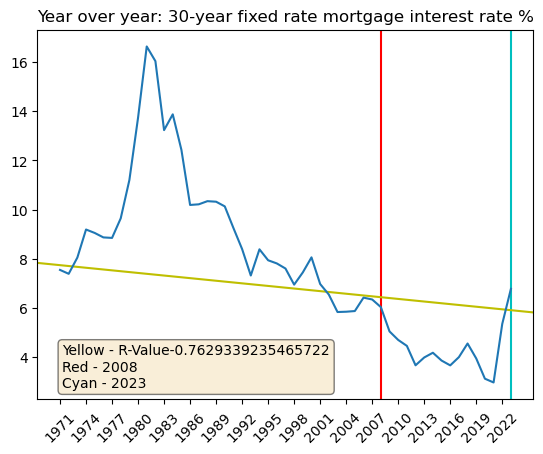

In [279]:
meanx1 = mean(m1.year)
meany1 = mean(m1.interestrates)
minx1 = min(m1.year)
maxx1 = max(m1.year)
maxy1 = max(m1.interestrates)
xm1 = meanx1
ym1 = (meany1 *r_m1) * -1

textstr = 'Yellow - R-Value{}\nRed - 2008\nCyan - 2023'.format(r_m1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: 30-year fixed rate mortgage interest rate %')
plt.xticks(np.arange(minx1, maxx1, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx1,meany1),(maxx1,ym1), color = 'y')
ax.text(0.05, 0.15, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m1.year,m1.interestrates)

In [215]:
meanx2 = mean(m2.year)
meany2 = mean(m2.gdppercapita)
minx2 = min(m2.year)
miny2 = min(m2.gdppercapita)
maxx2 = max(m2.year)
maxy2 = max(m2.gdppercapita)
xm2 = meanx2
ym2 = (maxy2 *r_m2)
ym2

93181.02658342248

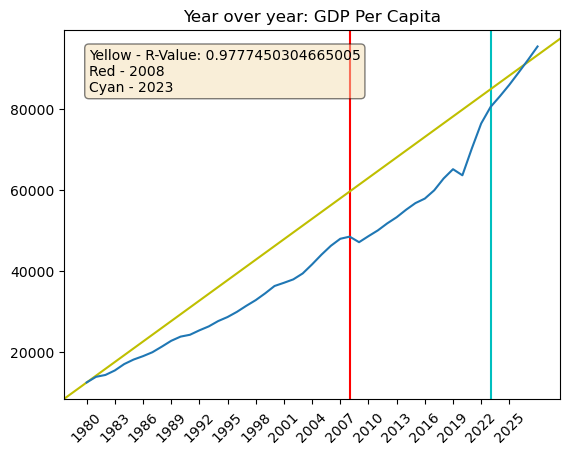

In [284]:
meanx2 = mean(m2.year)
meany2 = mean(m2.gdppercapita)
minx2 = min(m2.year)
miny2 = min(m2.gdppercapita)
maxx2 = max(m2.year)
maxy2 = max(m2.gdppercapita)
xm2 = meanx2
ym2 = (maxy2 *r_m2)

textstr = 'Yellow - R-Value: {}\nRed - 2008\nCyan - 2023'.format(r_m2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: GDP Per Capita')
plt.xticks(np.arange(minx2, maxx2, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx2,miny2),(maxx2,ym2), color = 'y')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m2.year,m2.gdppercapita)

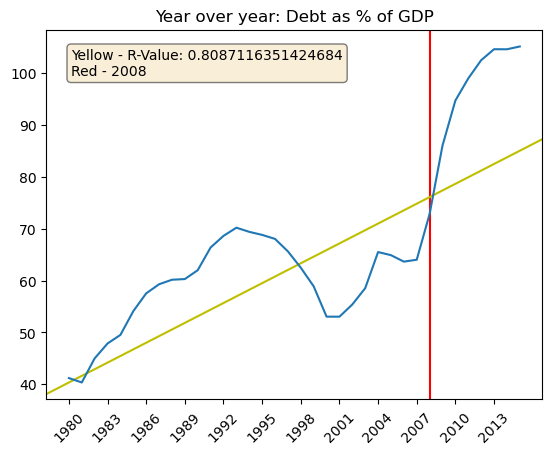

In [273]:
meanx3 = mean(m3.year)
meany3 = mean(m3.debtpercentofgdp)
minx3 = min(m3.year)
miny3 = min(m3.debtpercentofgdp)
maxx3 = max(m3.year)
maxy3 = max(m3.debtpercentofgdp)
xm3 = meanx3
ym3 = (maxy3 *r_m3)

textstr = 'Yellow - R-Value: {}\nRed - 2008'.format(r_m3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: Debt as % of GDP')
plt.xticks(np.arange(minx3, maxx3, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
#plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx3,miny3),(maxx3,ym3), color = 'y')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m3.year,m3.debtpercentofgdp)

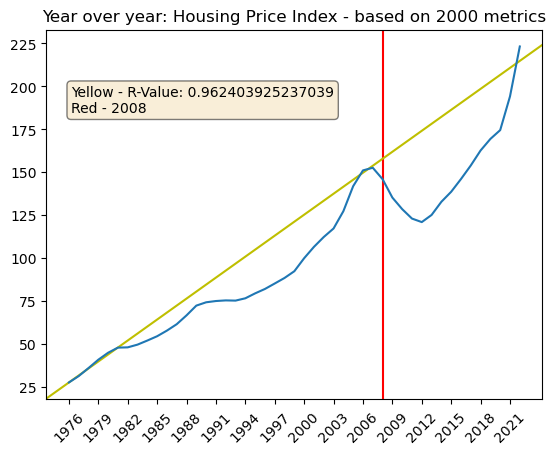

In [277]:
meanx4 = mean(m4.year)
meany4 = mean(m4.hpi2000base)
minx4 = min(m4.year)
miny4 = min(m4.hpi2000base)
maxx4 = max(m4.year)
maxy4 = max(m4.hpi2000base)
xm4 = meanx4
ym4 = (maxy4 *r_m4)

textstr = 'Yellow - R-Value: {}\nRed - 2008'.format(r_m4)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: Housing Price Index - based on 2000 metrics')
plt.xticks(np.arange(minx4, maxx4, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
#plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx4,miny4),(maxx4,ym4), color = 'y')
ax.text(0.05, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m4.year,m4.hpi2000base)

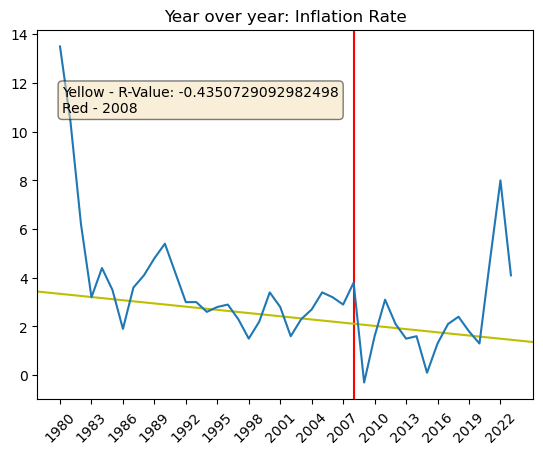

In [292]:
meanx5 = mean(m5.year)
meany5 = mean(m5.inflationrate)
minx5 = min(m5.year)
miny5 = min(m5.inflationrate)
maxx5 = max(m5.year)
maxy5 = max(m5.inflationrate)
xm5 = meanx5
ym5 = (meany5 *r_m5) * -1

textstr = 'Yellow - R-Value: {}\nRed - 2008'.format(r_m5)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: Inflation Rate')
plt.xticks(np.arange(minx5, maxx5, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
#plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx5,meany5),(maxx5,ym5), color = 'y')
ax.text(0.05, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m5.year,m5.inflationrate)

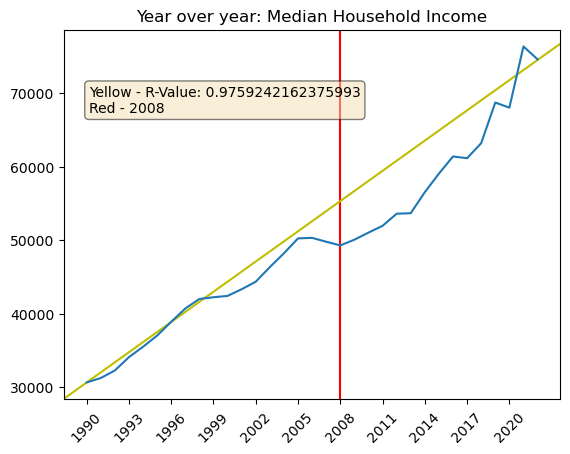

In [295]:
meanx6 = mean(m6.year)
meany6 = mean(m6.medianhouseholdincome)
minx6 = min(m6.year)
miny6 = min(m6.medianhouseholdincome)
maxx6 = max(m6.year)
maxy6 = max(m6.medianhouseholdincome)
xm6 = meanx6
ym6 = (maxy6 *r_m6)

textstr = 'Yellow - R-Value: {}\nRed - 2008'.format(r_m6)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: Median Household Income')
plt.xticks(np.arange(minx6, maxx6, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
#plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx6,miny6),(maxx6,ym6), color = 'y')
ax.text(0.05, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m6.year,m6.medianhouseholdincome)

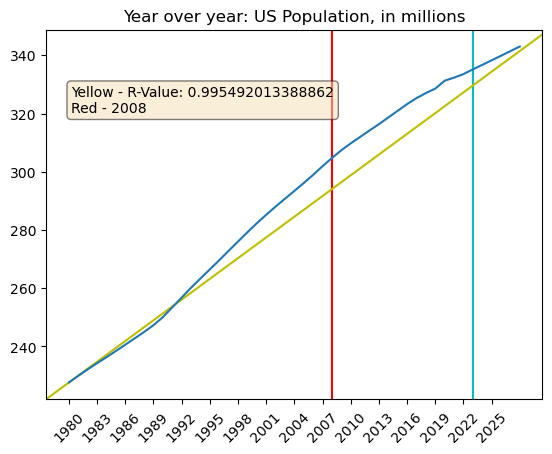

In [298]:
meanx7 = mean(m7.year)
meany7 = mean(m7.population)
minx7 = min(m7.year)
miny7 = min(m7.population)
maxx7 = max(m7.year)
maxy7 = max(m7.population)
xm7 = meanx7
ym7 = (maxy7 *r_m7)

textstr = 'Yellow - R-Value: {}\nRed - 2008'.format(r_m7)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: US Population, in millions')
plt.xticks(np.arange(minx7, maxx7, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx7,miny7),(maxx7,ym7), color = 'y')
ax.text(0.05, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m7.year,m7.population)

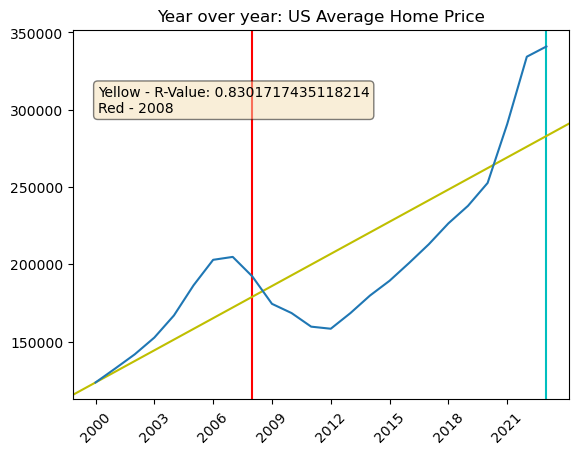

In [299]:
meanx8 = mean(m8.year)
meany8 = mean(m8.yearlyavghomeprice)
minx8 = min(m8.year)
miny8 = min(m8.yearlyavghomeprice)
maxx8 = max(m8.year)
maxy8 = max(m8.yearlyavghomeprice)
xm8 = meanx8
ym8 = (maxy8 *r_m8)

textstr = 'Yellow - R-Value: {}\nRed - 2008'.format(r_m8)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, ax = plt.subplots()
plt.title('Year over year: US Average Home Price')
plt.xticks(np.arange(minx8, maxx8, 3))
plt.xticks(rotation=45)
plt.axvline(2008, color = 'r', label = f'2008')
plt.axvline(2023, color = 'c', label = f'2023')
plt.axline((minx8,miny8),(maxx8,ym8), color = 'y')
ax.text(0.05, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props,)
plt.plot(m8.year,m8.yearlyavghomeprice)

## Conclusion:
It would seem that, based on a cursory glance of our datasets, we have 6 of our 8 metrics steadily going upwards:

Above 97% growth:

1. Population
2. GDP Per Capita
3. Median Household Income
4. Housing Price Index

Above 80% growth:


5. Yearly Average home price
6. Debt as a percentage of GDP

Data sets with falling metrics:

7. Inflation %
8. Interest rate %

In [119]:
m3 = debtpercentofgdp
m3['year'] = m3.index
m3["year"] = [float(str(i).replace(",", "")) for i in m3["year"]]
m3

,debtpercentofgdp,year
1980,41.18,1980.0
1981,40.33,1981.0
1982,44.98,1982.0
1983,47.85,1983.0
1984,49.51,1984.0
1985,54.09,1985.0
1986,57.52,1986.0
1987,59.28,1987.0
1988,60.15,1988.0
1989,60.28,1989.0


In [120]:
lin_debtpercentofgdp = scipy.stats.linregress(m3.year,m3.debtpercentofgdp)
r_debtpercentofgdp = lin_debtpercentofgdp.rvalue
lin_debtpercentofgdp

LinregressResult(slope=1.3874826254826258, intercept=-2704.1915444015453, rvalue=0.8087116351424684, pvalue=2.4155876372760803e-09, stderr=0.17307061902832405, intercept_stderr=345.71323662247295)

In [122]:
m4 = hpi2000base
m4['year'] = m4.index
m4["year"] = [float(str(i).replace(",", "")) for i in m4["year"]]
lin_m4 = scipy.stats.linregress(m4.year,m4.hpi2000base)
r_m4 = lin_m4.rvalue
lin_m4

LinregressResult(slope=3.3077324236817764, intercept=-6510.436902173914, rvalue=0.962403925237039, pvalue=4.142630628063937e-27, stderr=0.13916569156165615, intercept_stderr=278.1986221822471)

In [ ]:
plt.title('Year over year: Housing Price Index, compared to 2000 values')
plt.xticks(np.arange(0, len(metrics.year)+1, 3))
plt.xticks(rotation=45)
plt.axvline(37, color = 'r', label = '2008')
plt.axvline(52, color = 'c', label = f'2023')
plt.plot(metrics.year,metrics.hpi2000base)

In [ ]:
#variable reference
interestrates
gdppercapita
debtpercentofgdp
hpi2000base
inflationrate
medianhouseholdincome
population
yearlyavghomeprice
#year
yearlyavghomeprice.head(1)